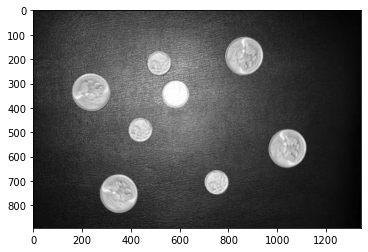

In [39]:
from PIL import Image
import pylab as plt
import numpy as np
import matplotlib.pyplot as pplt
import cv2
import math
%matplotlib inline

image = cv2.imread('coins.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

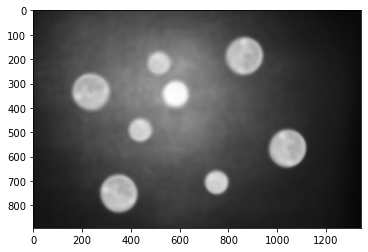

In [40]:
new = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB);
dst = cv2.fastNlMeansDenoisingColored(new, None, 100, 100, 11, 23)

plt.imshow(dst, cmap="gray")

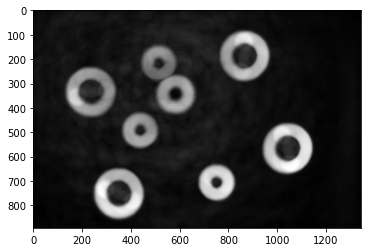

In [41]:
gray_image = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

close_size = 50
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (close_size, close_size))
opening = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)
plt.imshow(opening, cmap="gray")

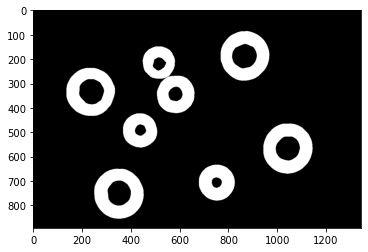

In [42]:
ret, img2 = cv2.threshold(opening, 0, 255, cv2.THRESH_OTSU)
plt.imshow(img2, cmap="gray")

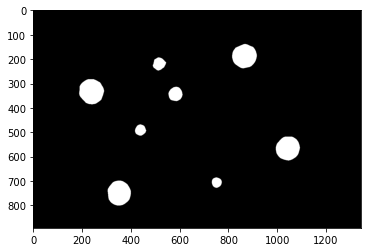

In [43]:
im_floodfill = img2.copy()
 
#Заполняет связанный компонент заданным цветом (все вокруг монет)
cv2.floodFill(im_floodfill, None, (0,0), 255)
 
#инвертируем заполненное изображение, чтобы получить внутренние части монет
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
plt.imshow(im_floodfill_inv, cmap="gray")

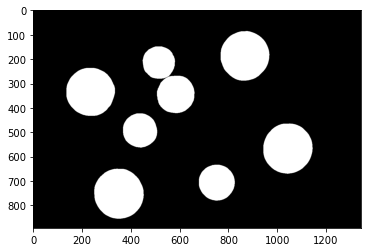

In [44]:
#объединяем внутренние и внешние части монет
im_out = img2 | im_floodfill_inv
plt.imshow(im_out, cmap="gray")

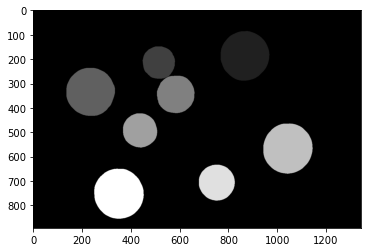

In [45]:
_, markers = cv2.connectedComponents(im_out)
plt.imshow(markers, cmap="gray")

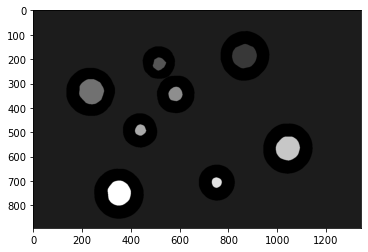

In [46]:
markers = markers + 1
markers[img2 == 255] = 0
plt.imshow(markers, cmap = "gray")

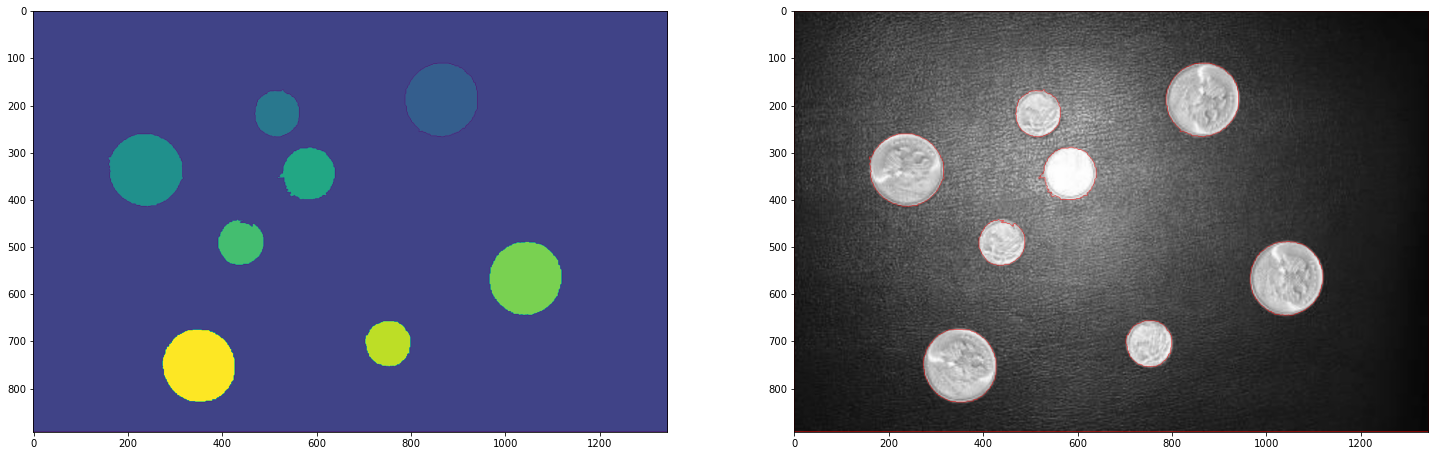

In [47]:
new_image = cv2.imread('coins.jpg', 1)
markers = cv2.watershed(new_image, markers)

new_image[markers == -1] = [255, 0, 0]

f, axarr = plt.subplots(1, 2, figsize = (25, 25))
axarr[0].imshow(markers)
axarr[1].imshow(new_image)

plt.show()

In [48]:
counturs, hierarchy = cv2.findContours(im_out, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = []
for cnt in counturs:
    area = cv2.contourArea(cnt)
    areas.append(area)
indices = np.array(areas).argsort()
areas = sorted(areas)
border_val_id = np.argmax(np.diff(areas))

In [49]:
small = indices[:border_val_id+1]
big = indices[border_val_id+1:]

Objects: 8
Big coins: 4
Small coint: 4


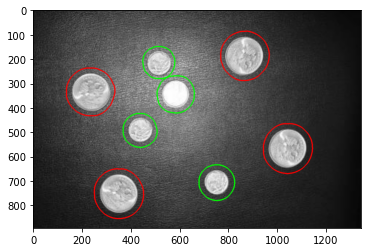

In [50]:
countour_img = image.copy()
print(f"Objects: {len(indices)}")
print(f"Big coins: {len(big)}")
print(f"Small coint: {len(small)}")
for i in indices:
    if i in small:
        cv2.drawContours(countour_img, counturs, i, (0, 255, 0), 3)
    else:
        cv2.drawContours(countour_img, counturs, i, (255, 0, 0), 3)
plt.imshow(countour_img)